# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Sivert Escaff
- Nombre de alumno 2: Rodrigo Montecino

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [1]:
def optimize_model():
  pass

In [1]:
pip install optuna mlflow xgboost scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import optuna
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle
import matplotlib.pyplot as plt
import json

def save_plots(trial, valid_f1):
    plots_dir = "plots"
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    
    fig, ax = plt.subplots()
    ax.plot(trial.number, valid_f1, 'ro-')  
    ax.set_title(f"Trial {trial.number} Performance")
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('F1 Score')
    plot_path = os.path.join(plots_dir, f"plot_trial_{trial.number}.png")
    fig.savefig(plot_path)
    plt.close(fig)
    return plot_path

def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    best_model_id = runs.sort_values("metrics.valid_f1", ascending=False).iloc[0]['run_id']
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")
    return best_model

def objective(trial):
    with mlflow.start_run(nested=True) as child_run:
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 8),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        }
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
        
        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        valid_f1 = f1_score(y_test, y_pred, average='weighted')
        
        mlflow.log_params(params)
        mlflow.log_metric("valid_f1", valid_f1)
        mlflow.sklearn.log_model(model, "model")
        
        plot_path = save_plots(trial, valid_f1)
        mlflow.log_artifact(plot_path)
        
        return valid_f1

def optimize_model():
    if not os.path.exists('models'):
        os.makedirs('models')
    if not os.path.exists('plots'):
        os.makedirs('plots')

    with mlflow.start_run() as run:
        mlflow.set_experiment("XGBoost_Optuna_Integration")
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=50)
        best_model = get_best_model(run.info.experiment_id)

    model_path = os.path.join("models", "best_model.pkl")
    with open(model_path, "wb") as f:
        pickle.dump(best_model, f)

    mlflow.log_artifacts("plots")
    mlflow.sklearn.log_model(best_model, "best_model")
    

    versions = {
        'optuna': optuna.__version__,
        'mlflow': mlflow.__version__,
        'xgboost': XGBClassifier.__module__,
        'sklearn': f1_score.__module__
    }
    with open('models/versions.json', 'w') as f:
        json.dump(versions, f)
    mlflow.log_artifact('models/versions.json')

    return best_model

# Load data
X, y = load_iris(return_X_y=True)

# Optimize and save the model
best_model = optimize_model()


[I 2024-11-29 19:17:08,287] A new study created in memory with name: no-name-4714d403-6361-4df9-bcce-b794c7c1dbd9
2024/11/29 19:17:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 19:17:23,190] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 6, 'learning_rate': 0.014140522980550038, 'n_estimators': 167, 'subsample': 0.6235126553694277, 'colsample_bytree': 0.7593397113723462}. Best is trial 0 with value: 1.0.
2024/11/29 19:17:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 19:17:28,347] Trial 1 finished with value: 1.0 and parameters: {'max_depth': 6, 'learning_rate': 0.12792023316207887, 'n_estimators': 92, 'subsample': 0.6639299850709642, 'colsample_bytree': 0.8287587107358589}. Best is

KeyError: 'metrics.valid_f1'

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

In [ ]:
from flask import Flask, request, jsonify, abort
import pickle
import os
import numpy as np

app = Flask(__name__)

# Cargar el modelo entrenado, hay que poner la ruta del pc generado anteriormente 
model_path = 'models/best_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
else:
    raise FileNotFoundError("No se pudo encontrar el modelo en la ruta especificada.")

@app.route('/')
def home():
    return """
    <h1>API de Predicción de Potabilidad del Agua</h1>
    <p>Utiliza el modelo XGBoost para predecir si el agua es potable basándose en características químicas.</p>
    """

@app.route('/potabilidad', methods=['POST'])
def predict():
    if not request.json:
        abort(400, description="Por favor envíe los datos como JSON.")
    
    # Espera recibir todas las características necesarias para la predicción
    features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                'Organic_carbon', 'Trihalomethanes', 'Turbidity']
    input_data = [request.json.get(feature) for feature in features]
    
    if None in input_data:
        missing = [features[i] for i in range(len(input_data)) if input_data[i] is None]
        abort(400, description=f"Faltan las siguientes características en los datos proporcionados: {missing}")
    
    # Predecir la potabilidad
    prediction = model.predict(np.array([input_data]))[0]
    
    return jsonify({'potabilidad': int(prediction)}), 200

if __name__ == '__main__':
    app.run(debug=True)


# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?


 1
Docker utiliza contenedores para ejecutar aplicaciones en un entorno aislado, compartiendo el mismo kernel del host. Esto lo hace más ligero y rápido en comparación con una VM, que necesita un sistema operativo completo , resultando en mayor uso de recursos.

 2
Usar Docker proporciona un entorno consistente y que es posible reproducir de manera sencilla, independientemente del sistema operativo o configuración local. esto evita los problemas muy recurrente de "solo funciona en mi pc", ya que la aplicación funcionará igual en cualquier máquina que soporte Docker, a diferencia de ejecutarla directamente en el sistema local donde puede estar sujeta a variaciones de configuración.

3
Docker asegura esta consistencia mediante el uso de imágenes Docker, que son especificaciones exactas de cómo debe ser el entorno de ejecución de una aplicación. Estas imágenes pueden ser usadas para desplegar contenedores que son idénticos en cualquier entorno, desde desarrollo hasta producción, garantizando que las diferencias de entorno no afecten el funcionamiento de la aplicación.

 4
Los volúmenes en Docker son unidades de almacenamiento persistente y gestionada que permiten guardar datos fuera del ciclo de vida de los contenedores individuales. Se pueden montar en contenedores y son accesibles independientemente del estado del contenedor, lo que permite gestionar datos que no se pierden cuando un contenedor es detenido o eliminado, dando una seguridad robusta a los datos en este entorno.

 5
- **Dockerfile**: Es un archivo de texto que contiene todas las instrucciones necesarias para construir una imagen Docker. Define el entorno, las dependencias, y los comandos necesarios para configurar y ejecutar la aplicación dentro de un contenedor.
- **docker-compose.yml**: Es un archivo YAML que se utiliza para definir servicios, redes y volúmenes en una aplicación multi-contenedor con Docker Compose. Permite configurar y gestionar todos los aspectos de los contenedores en conjunto, simplificando el proceso de despliegue de aplicaciones compolejas.


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()

class Item(BaseModel):
    ph: float
    hardness: float
    solids: float
    chloramines: float
    sulfate: float
    conductivity: float
    organic_carbon: float
    trihalomethanes: float
    turbidity: float

@app.post("/potabilidad/")
def predict(item: Item):
    return {"potabilidad": 1}

@app.get("/")
def read_root():
    return {"Hello": "World"}


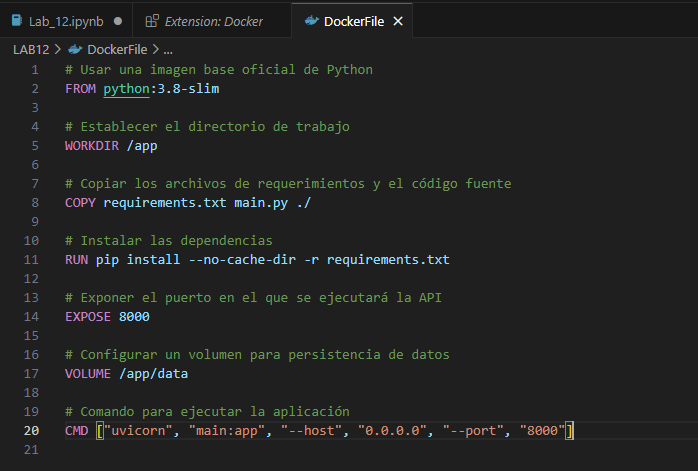

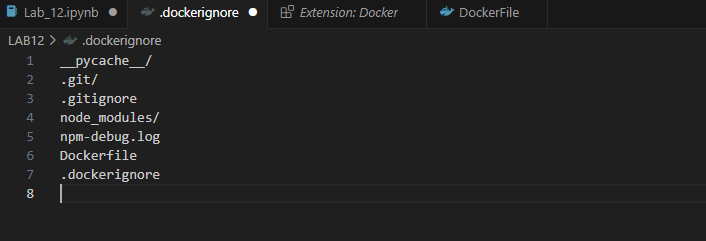

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>